In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import numpy as np
import pandas as pd
import datetime

np.set_printoptions(suppress=True)

In [ ]:
from stocks import Stocks
from agents.dqn import DQN
from agents.reinforce import REINFORCE
from environment import Env
from simulation import Simulation
from utils import *
from visualizations import *
from logger import Logger

tickers = ['MSFT', 'GE', 'AXP', 'AON']

train_stocks = Stocks(tickers, start='2000-1-1', end='2004-12-31')
test_stocks = Stocks(tickers, start='2005-1-1', end='2019-09-30')

run = f'run_{datetime.datetime.now().strftime("%Y-%m-%d-%H:%M:%S")}'

agent     = DQN()
train_env = Env(stocks=train_stocks, window_size=30, fee=0.0, logger=Logger(name=f'{run}_train'))
test_env  = Env(stocks=test_stocks, window_size=30, fee=0.0, logger=Logger(name=f'{run}_test'))

sim = Simulation(agent, train_env, test_env)
sim.run(500)

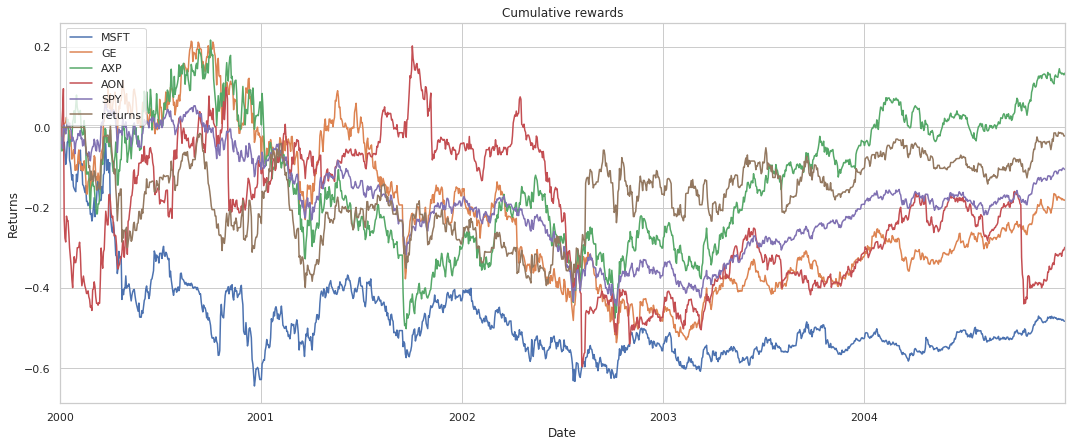

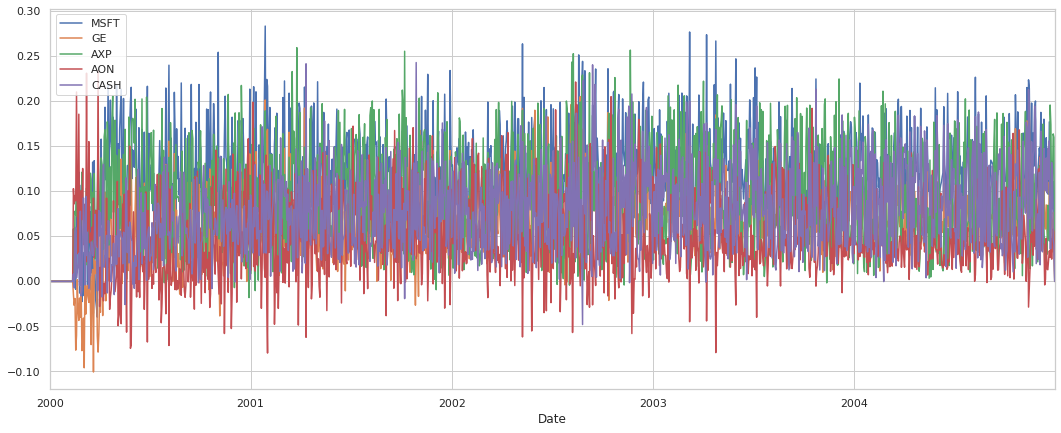

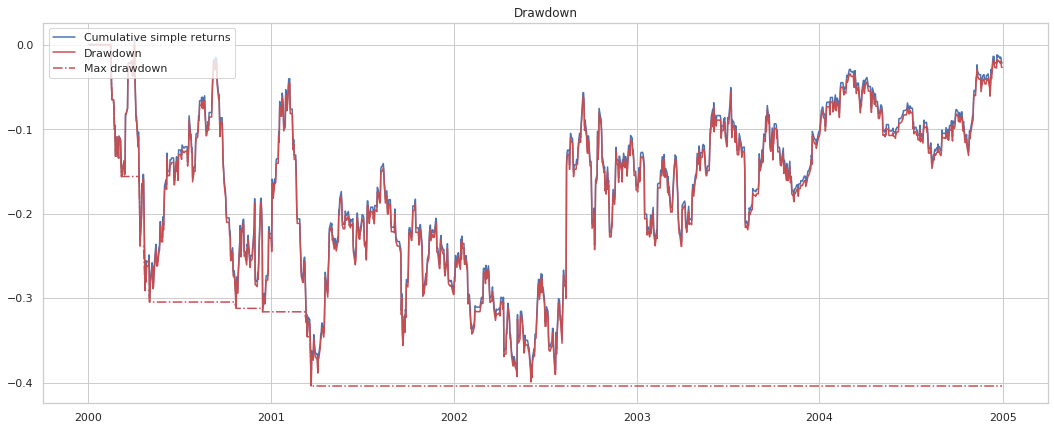

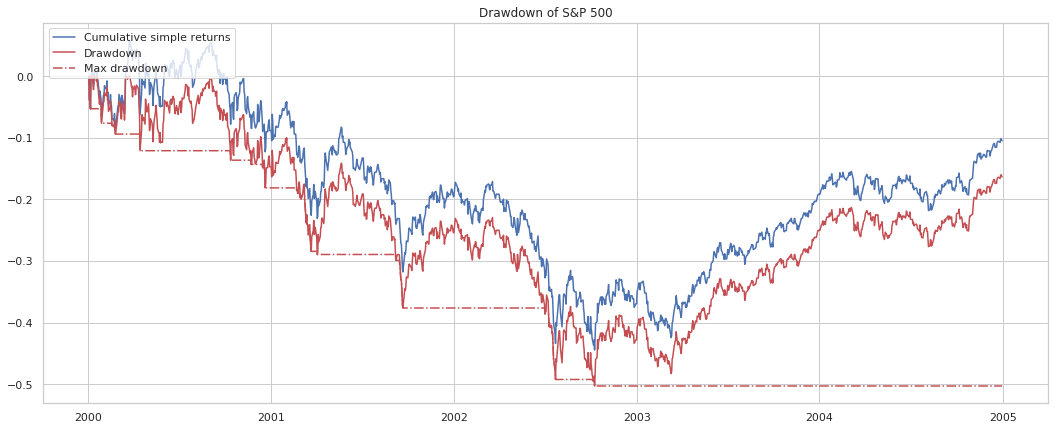

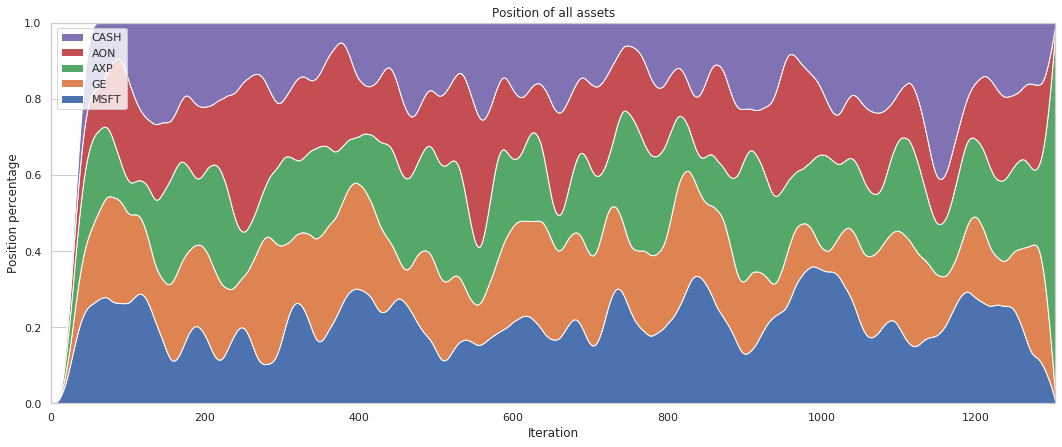

,Sharpe ratio
MSFT,-0.284076
GE,0.11586
AXP,0.566038
AON,0.14067
SPY,-0.00844067
returns,0.346748


In [9]:
def plot_results(episode, mode):
    # Open the log file
    positions, rewards, returns, q_values = agent.load_logs(episode, mode)
    
    start = '2000-1-1' if mode == 'training' else '2005-1-1'
    end   = '2004-12-31' if mode == 'training' else '2019-09-30'
    
    # Get the baseline stocks
    baseline = Stocks([*tickers, 'SPY'], start=start, end=end)
    
    # Plot cumulative rewards
    plot_cumulative_returns(pd.concat([simple_returns(baseline.prices), returns], 1))
    
    # Plot q values
    plot(q_values)
    
    # Drawdown plot
    plot_drawdown(returns)
    
    # Drawdown of the S&P index
    plot_drawdown(simple_returns(baseline.prices['SPY']), title='Drawdown of S&P 500')
    
    # Position percentages
    plot_positions(positions)
    
    return show_sharpe_ratio(pd.concat([simple_returns(baseline.prices), returns], 1))
    
plot_results(0, 'training')